# A MOVIE RECOMMENDER SYSTEM PREDICT EDSA PROJECT

### Project Members
1. Francis Njoroge Muthoni - Data Science EDSA
2. Jamie Snyder - Project Team Lead



In [ ]:
!pip install comet_ml

     |████████████████████████████████| 342 kB 4.9 MB/s 
     |████████████████████████████████| 551 kB 50.4 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=453ab8e79ec056b079d1236bf6098cf398beefc06d0779a69c18b4d684ebebd7
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="jNrV8ZnznH518uQ5vfYKXHYrZ",
    project_name="a-recommender-system-project",
    workspace="frank6496",
)

# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.5,
    "steps": 100000,
    "batch_size": 50,
}
experiment.log_parameters(hyper_params)

# Or report single hyperparameters:
hidden_layer_size = 50
experiment.log_parameter("hidden_layer_size", hidden_layer_size)

# Long any time-series metrics:
train_accuracy = 3.14
experiment.log_metric("accuracy", train_accuracy, step=0)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/frank6496/a-recommender-system-project/14e22cd1554541f695fe857bf27fd9d5



In [1]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as sc

# Data Preprocessing
import random
from time import time
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Models
!pip install scikit-surprise

from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# plt.style.use('fivethirtyeight')
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 50)

     |████████████████████████████████| 11.8 MB 5.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630159 sha256=fd8130ae8ba2b741d97a6d630d4ae77cefc777eb427fdb410d0e0f5970bb741e
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

# Kaggle setup

In [2]:
#Kaggle setup
! pip install -q kaggle

from google.colab import  files

files.upload()

#Creating a kaggle folder for our data
!mkdir ~/.kaggle

#Copying the downloaded kaggle.json file to a new folder
! cp kaggle.json ~/.kaggle/

#Granting permissions for copying it in our root folder
! chmod 600  ~/.kaggle/kaggle.json

#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            505        544  0.9375           
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2782         70  0.8235294        
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00            

# Downloading the data from kaggle for our project

In [3]:
#Downloading the dataset from kaggle competitions
! kaggle competitions download -c 'edsa-movie-recommendation-wilderness'

 97% 233M/239M [00:03<00:00, 129MB/s]
100% 239M/239M [00:03<00:00, 75.9MB/s]


unzipping out our downloaded files

In [4]:
#Unziping my datasets
! mkdir datasets
!unzip edsa-movie-recommendation-wilderness.zip -d datasets

Archive:  edsa-movie-recommendation-wilderness.zip
  inflating: datasets/genome_scores.csv  
  inflating: datasets/genome_tags.csv  
  inflating: datasets/imdb_data.csv  
  inflating: datasets/links.csv      
  inflating: datasets/movies.csv     
  inflating: datasets/sample_submission.csv  
  inflating: datasets/tags.csv       
  inflating: datasets/test.csv       
  inflating: datasets/train.csv      


In [5]:
# Loading our dataset using pandas
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
tags = pd.read_csv('datasets/tags.csv')
links = pd.read_csv('datasets/links.csv')
imdb_data = pd.read_csv('datasets/imdb_data.csv')
movies = pd.read_csv('datasets/movies.csv')
genome_tags = pd.read_csv('datasets/genome_tags.csv')
genome_score = pd.read_csv('datasets/genome_scores.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

Viewing our data to understand their structures

In [ ]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


# Exploratory Data Analysis (E.D.A)

**_Exploring our datasets_**

To get a feeling of the data you we are working with, it helps to play around a little and create some quick stats and graphs for different aspects of it. This will help you have a better overview of what the data is about. And since I want to find out how well movies are liked or disliked, the most important variable is the movie rating. Let’s see its distribution

In [ ]:
!pip install dabl

     |████████████████████████████████| 558 kB 33.2 MB/s 


In [ ]:
import dabl

1. Exploring the train dataset

In [ ]:
# checking the shape of our dataset
train.shape

(10000038, 4)

In [ ]:
dabl.clean(train, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    1
categorical     0
date            0
free_string     0
useless         0
dtype: int64


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [ ]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [ ]:
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
# checking the summary of our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
print("Missing values in our Train dataset: ")
print(str(train.isnull().sum()))

Missing values in our Train dataset: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


2. Exploring the Test dataset

In [ ]:
test_clean = dabl.clean(test, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    1
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [ ]:
test.shape

(5000019, 2)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
print("Missing values in our Test dataset: ")
print(str(test.isnull().sum()))

Missing values in our Test dataset: 
userId     0
movieId    0
dtype: int64


3. Exploring the tag dataset

In [ ]:
tags_clean = dabl.clean(tags, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         0
dtype: int64


In [ ]:
tags.shape

(1093360, 4)

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [ ]:
print("Missing values in our Tags dataset: ")
print(str(tags.isnull().sum()))

Missing values in our Tags dataset: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


4. Exploring the links dataset

In [ ]:
links_clean = dabl.clean(links, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [ ]:
links.shape

(62423, 3)

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
print("Missing values in our Links dataset: ")
print(str(links.isnull().sum()))

Missing values in our Links dataset: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [ ]:
# dropping missing rows in our links dataset
links.dropna(axis=0,inplace=True)

5. Exploring the imdb dataset

In [ ]:
imdb_data_clean = dabl.clean(imdb_data, verbose=1)

Detected feature types:
continuous      2
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     4
useless         0
dtype: int64


In [ ]:
imdb_data.shape

(27278, 6)

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
print("Missing values in our IMDB_DATA dataset: ")
print(str(imdb_data.isnull().sum()))

Missing values in our IMDB_DATA dataset: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


6. Exploring the movies dataset

In [ ]:
movies_clean = dabl.clean(movies, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     2
useless         0
dtype: int64


In [ ]:
movies.shape

(62423, 3)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
print("Missing values in our Movies dataset: ")
print(str(movies.isnull().sum()))

Missing values in our Movies dataset: 
movieId    0
title      0
genres     0
dtype: int64


7. Exploring the genome_tags dataset

In [ ]:
genome_tags_clean = dabl.clean(genome_tags, verbose=1)

Detected feature types:
continuous      0
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         1
dtype: int64


In [ ]:
genome_tags.shape

(1128, 2)

In [ ]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
print("Missing values in our Genome_tags dataset: ")
print(str(genome_tags.isnull().sum()))

Missing values in our Genome_tags dataset: 
tagId    0
tag      0
dtype: int64


8. Exploring the genome_score dataset

In [ ]:
genome_score_clean = dabl.clean(genome_score, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    2
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [ ]:
genome_score.shape

(15584448, 3)

In [ ]:
genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [ ]:
print("Missing values in our Genome_scores dataset: ")
print(str(genome_score.isnull().sum()))

Missing values in our Genome_scores dataset: 
movieId      0
tagId        0
relevance    0
dtype: int64


9. Exploring the sample submission dataset

In [ ]:
sample_submission_clean = dabl.clean(sample_submission, verbose=1)

Detected feature types:
continuous      0
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         1
dtype: int64


In [ ]:
sample_submission.shape

(5000019, 2)

In [ ]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


## Visualizing patterns in our data

Visualizing the distribution of user ratings

Text(0.5, 1.0, 'Distribution of user ratings\n\n')

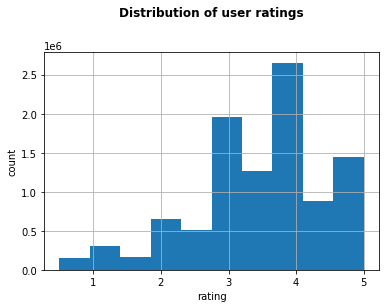

In [ ]:
# let’s look at a visual representation of the training data by creating a histogram
train['rating'].hist(bins=10)
plt.xlabel('rating')
plt.ylabel('count')
  
plt.title('Distribution of user ratings\n\n',
          fontweight ="bold")

In [ ]:
# printing how many unique user id's we have in our dataset
print(f"You have {len(train.userId.unique())} unique user ids in the data")

You have 162541 unique user ids in the data


In [6]:
train = train.merge(movies, on='movieId')

converting our timestamp column to a year column

In [7]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
import datetime

train['production_year'] = train['timestamp'].apply(lambda timestamp: datetime.date.fromtimestamp(timestamp).year)
train.drop('timestamp', axis=1, inplace=True)

In [ ]:
# train dataframe after merge with movies dataframe, the creation of year and dropping of the timestamp columns respectively
train.head()

,userId,movieId,rating,title,genres,production_year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015


In [8]:
dummies = train['genres'].str.get_dummies()
dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


You can concatenate these dummies to the original movies_rating data frame

In [9]:
tidy_movie_ratings = (pd.concat([train, dummies], axis=1))

tidy_movie_ratings.head()

,userId,movieId,rating,title,genres,production_year,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


visualizing the total volume of films created over the years where I'm will count the total number of productions for each year and plot it. The record you see for the year of 2021 should be filtered out before proceeding

In [10]:
condition = train["production_year"].astype(int) < 2021

prodcount = (train[condition][["production_year", "movieId", "genres"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail()

,movieId,genres
production_year,,
2015,641896,641896
2016,702962,702962
2017,676350,676350
2018,524706,524706
2019,481092,481092


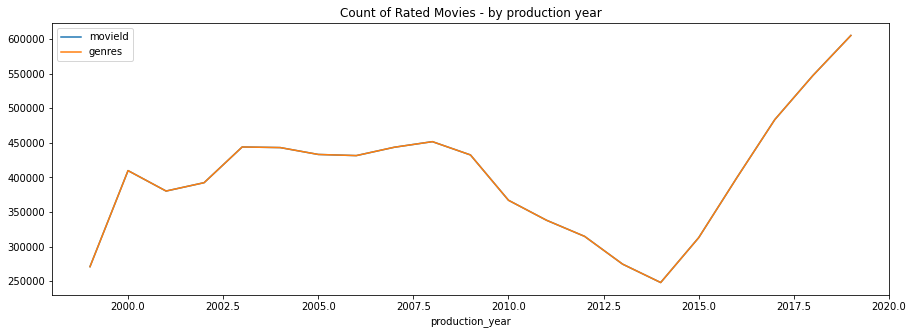

In [11]:
(prodcount
 .rolling(5).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(15,5),
       title="Count of Rated Movies - by production year")
)

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f264a667950>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263deddf90>,
       dtype=object)]

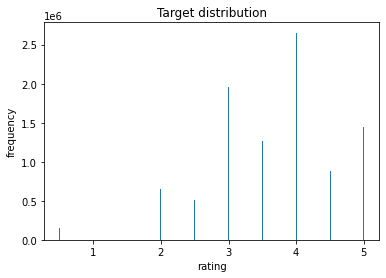

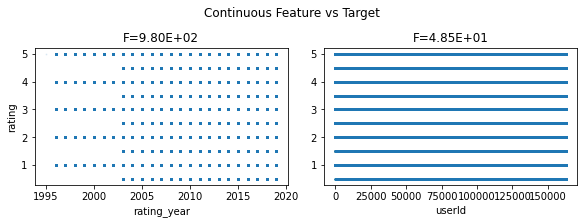

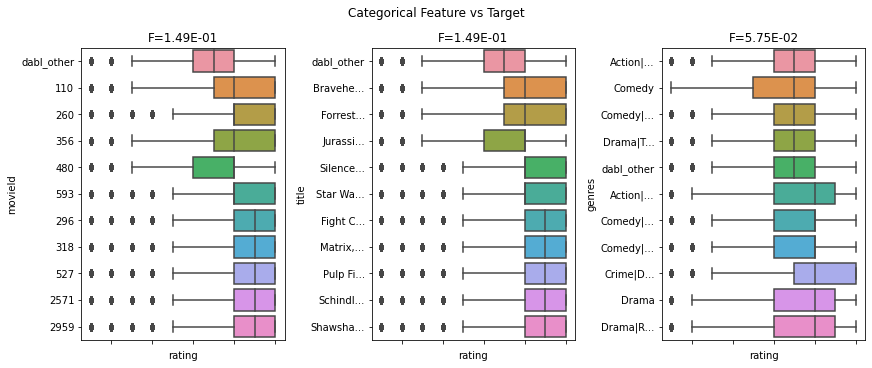

In [ ]:
dabl.plot(train, target_col="rating")

Target looks like regression


KeyboardInterrupt: ignored

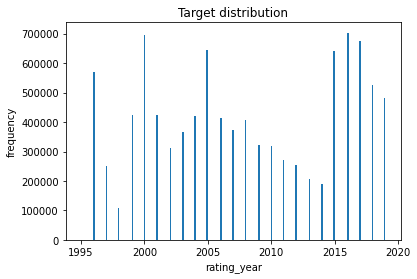

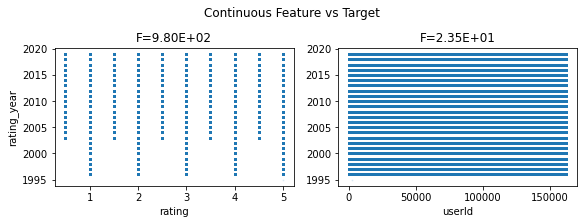

In [ ]:
dabl.plot(train, target_col="rating_year")

In [ ]:
dabl.plot(movies_rating, target_col="userId")

In [ ]:
dabl.plot(movies_rating, target_col="movieId")

Evaluating the rating counts of users in our dataset

In [ ]:
def user_ratings_count(df, n):
    plt.figure(figsize=(10,8))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="green")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
        plt.title(f'Top {n} Users by Number of Ratings', fontsize=16)
        plt.xlabel('User ID')
        plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 49658 
Total number of movies:		 48213


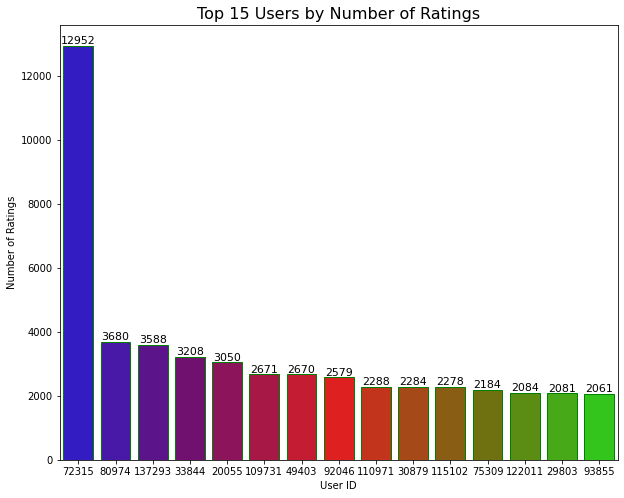

In [ ]:
user_ratings_count(train, 15)

In [12]:
# Counting the number of times a specific rating has been rated.
train_rating = pd.DataFrame(
    train['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


**Q- What have people watched or rated most since 2000...?**

For this question, I'm going to focus on the genres with a high volume of movies. I'm going to identify the top 10 genres with the highest number of movies in them, and filter them out to produce the next chart

In [ ]:
# top 10 genres by the total number of movies
top10_genre = (tidy_movie_ratings.iloc[:, 4:-1] # get the genre columns only
              .sum() # summing them up
              .sort_values(ascending=False) # sorting them in descending order
              .head(10) # getting the first 10
              .index.values # getting the genre names
              )

top10_genre

Now, I want to get the ratings for these genres from our tidy_movie_ratings data frame, but restrict the ratings to only the movies made between 2000 and 2021

In [ ]:
genre_groups = (tidy_movie_ratings.iloc[:, 4:]
                .groupby(tidy_movie_ratings["production_year"])
                .sum()
                ).loc["2000":"2021", top10_genre] # since 2000 upto 2021

Finally, I'm going to create a graph showing a 5-year moving average of the total volume of rated films:

In [ ]:
genre_groups.rolling(5).mean().plot(figsize=(15,5), title="Total Rated Films")

On the other hand, some patterns can be misleading since we are only looking at the absolute numbers. Therefore, another way to analyze this phenomenon would be to look at the percentage changes. This could help your decision making if you are, let’s say, in the business of online movie streaming

In [ ]:
percent_change = (tidy_movie_ratings.iloc[:, 4:]
                    .groupby(tidy_movie_ratings["production_year"])
                    .sum()
                    .pct_change(periods=5) # 5 years percent change of the volume
                   ).loc["2000":"2021", top10_genre]

From this filtered data, let’s produce a 5-years moving average graph

In [ ]:
(percent_change.rolling(10).mean() # 10 years moving average
 .plot(figsize=(15,5),
       title="Percentage Change in Rated Films"))

**Top Rated Sci-Fi Movies by Decades**

Let’s say you’re still building out your imaginary streaming service, you understood that the interest in Sci-Fi movies is rising sharply, and you want to make it easy for your users to find the best Sci-Fi movies of all times. What are the movies from each decade which you could suggest to your users by default?

In [ ]:
cols = ["title", "rating", "production_year", "Sci-Fi", "movieId"]
condition0 = tidy_movie_ratings["production_year"].astype(int) < 2021
condition1 = tidy_movie_ratings["Sci-Fi"] == 1

scifi = (tidy_movie_ratings
         [cols]
         [condition0 & condition1]
         .drop("Sci-Fi", axis=1)
        )

scifi["decade"] = scifi['production_year'].astype(int)//10*10

scifi.head()

,title,rating,production_year,movieId,decade
8901,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,5.0,2004,5459,2000
8902,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,2.0,2017,5459,2010
8903,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,3.0,2017,5459,2010
8904,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,3.5,2010,5459,2010
8905,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,3.5,2015,5459,2010


Next, you will filter for movies that have more than 10 ratings. But how can you find how many times a movie was rated? Here .groupby() comes to the rescue. After getting the counts, you will generate a new list called movie_list with the condition that a movie needs to have greater than 10 ratings. Below, the final operation will be only about getting the indices of the filtered count_group. You will achieve that by using .index.values method

In [ ]:
count_group = scifi.groupby("movieId").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([24, 29, 32, 66, 76])

movie_list now contains those movies that have been rated more than 10 times. Next, you will filter on your scifi base table using the movie_list. Notice the usage of the .isin() method. It is quite user-friendly and straight-forward

In [ ]:
condition = scifi["movieId"].isin(movie_list)
columns = ["title", "decade", "rating"]

scifi_filtered = scifi[condition][columns]

After you created the filtered_scifi table, you can focus on building up your metrics in order to select the best liked movies of each decade. You will look at the average rating, and you will need to .groupby() decade and movie_title.

It is important to sort the aggregated value in a descending order to get the results you are expecting. You want each group to have a maximum of 5 films, so a lambda expression can help you to loop through the decade groups and show only the top 5. Otherwise, if there are less than 5 films in a decade, you want to show only the top movie, meaning only 1 record. Finally you will round the ratings to two decimal points

In [ ]:
top_rate_by_decade = (scifi_filtered
                     .groupby(["decade", "title"])
                     .mean()
                     .sort_values(["decade", "rating"],
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round(2)

top_rate_by_decade

## Modelling

To reduce the computational time, it is necessary to train and evaluate the our models on a 200k subset of the data through which the best performing model will be trained on the whole dataset to predict the ratings for the final submission file.

In [ ]:
# Loading 200k dataset
train.drop('timestamp', axis=1, inplace=True)
train_subset = train[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

**_Collaborative Filtering_**

**_1. CoClustering_**

In [ ]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


**_2. NMF_**

In [ ]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1636


**_3. BaselineOnly_**

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9735


**_4. SlopeOne_**

In [ ]:
slo_test = SlopeOne()
slo_test.fit(trainset)
predictions = slo_test.test(testset)
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


**_5. SVD_**

In [ ]:
svd_test = SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9746


**_Content-Based Filtering_**

It is a type of recommender system that attempts to guess what a user may like based on that user's activity. Content-based filtering makes recommendations by using keywords and attributes assigned to objects in a database (e.g., items in an online marketplace) and matching them to a user profile

In [ ]:
def data_preprocessing(subset_size):
    # Spliting genres data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset

    
def content_model(movie_list,top_n=10): 
# Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index = data.index, columns = data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

In [ ]:
movies = movies.dropna()
movie_list = ['Grumpier Old Men (1995)','Ace Ventura: When Nature Calls (1995)','Father of the Bride Part II (1995)']
content_model(movie_list,top_n=10)

['Jury Duty (1995)',
 'Living in Oblivion (1995)',
 'Party Girl (1995)',
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
 'Billy Madison (1995)',
 'Man of the House (1995)',
 'Rent-a-Kid (1995)',
 'Tommy Boy (1995)',
 'Air Up There, The (1994)',
 'Beverly Hillbillies, The (1993)']

## Performance Evaluation

I've built and tested 4 different collaborative filtering models and compared their performance using a statistical measures which determines the average squared difference between the actaul and estimated values which is known as the root mean squared error [ R.M.S.E ].

**NB:** -
**_A low RMSE value indicates high model accuracy._**

**Root Mean Squared Error [ R.M.S.E ]**

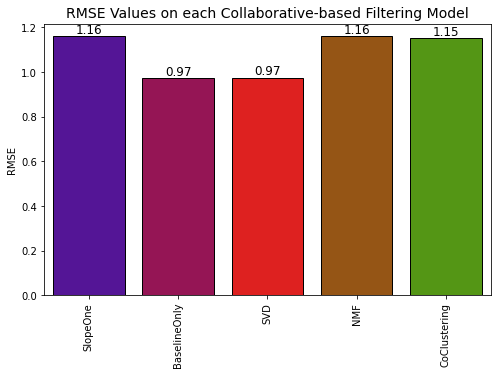

In [ ]:
# Comparing the RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SlopeOne', 'BaselineOnly', 'SVD','NMF','CoClustering']
rmse_y = [slo_rmse, blo_rmse, svd_rmse, nmf_rmse, cc_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Values on each Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

**_Cross Validation_**


It refers to a technique used to test the accuracy of a models prediction on unseen data which is crucial since it can assist in picking up issues such as underfitting, overfitting and selection bias in our dataset. And thus the K-fold technique was necessary to perform cross validation on our best perfoming models i.e. BaselineOnly and SVD models.

In [ ]:
base_options = {'method': 'sgd','n_epochs': 50}
blo_test = BaselineOnly(bsl_options=base_options)
# Run 5-fold cross-validation and print results
a = cross_validate(blo_test, data, measures=['RMSE'], cv=4, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE of algorithm BaselineOnly on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9710  0.9578  0.9751  0.9774  0.9703  0.0076  
Fit time          1.86    1.89    1.90    1.90    1.89    0.02    
Test time         0.15    0.14    0.14    0.16    0.15    0.01    


In [ ]:
svd_test = SVD(n_epochs = 50, n_factors = 200, init_std_dev = 0.05, random_state=42)
# Run 5-fold cross-validation and print results
b = cross_validate(svd_test, data, measures=['RMSE'], cv=4, verbose=True)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9742  0.9720  0.9750  0.9634  0.9711  0.0046  
Fit time          22.41   20.73   20.91   20.87   21.23   0.68    
Test time         0.20    0.19    0.44    0.19    0.25    0.10    


## Analysing our model

In [ ]:
# Load the 100k dataset
train_subset = train[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

## Tuning our model

**_Hyperparameter Tuning_**

This refers to the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter in which a value is set manually and tuned to control the algorithm's learning process.  And on this step I tested multiple parameters on my model in order to get the best performing model of my choice.

In [ ]:
param_grid = {'n_epochs':[50], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[45]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9675272441783862
***Best parameters:***
{'n_epochs': 50, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 45}


In [ ]:
svd_test = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.005, random_state=45)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculating our RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9745


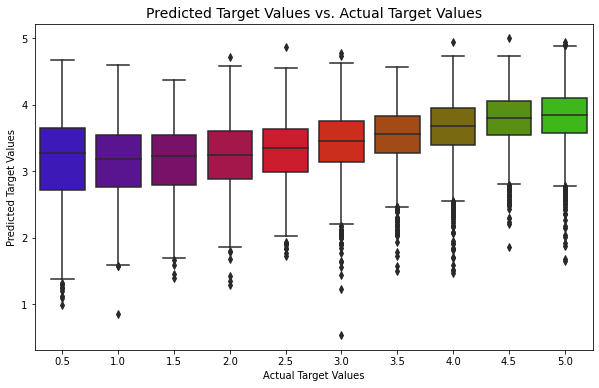

In [ ]:
# Predicted Target Values vs. Actual Target Values
new_df = pd.DataFrame(columns=['uid', 'iid', 'rating'])
i = 0
for (uid, iid, rating) in testset:
    new_df.loc[i] = [uid, iid, rating]
    i = i+1
true = new_df['rating']
pred = []
for i in predictions:
    pred.append(i.est)
fig,axis = plt.subplots(figsize=(10, 6))
sns.boxplot(x=true, y=pred, palette="brg")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.show()

## Saving out findings

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.